In [1]:
import pandas as pd

raw_data = pd.read_csv('kirana_2.csv')

raw_data.info()

raw_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tx_id               15000 non-null  object 
 1   store_type          15000 non-null  object 
 2   timestamp           15000 non-null  object 
 3   total_amount        15000 non-null  float64
 4   payment_method      15000 non-null  object 
 5   tendered_amount     9698 non-null   float64
 6   tendered_breakdown  9698 non-null   object 
 7   change_given        15000 non-null  float64
 8   change_breakdown    7248 non-null   object 
 9   notes               5302 non-null   object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


,tx_id,store_type,timestamp,total_amount,payment_method,tendered_amount,tendered_breakdown,change_given,change_breakdown,notes
0,536f3464-a3d2-4d5b-9e69-e6b7c3b2ff74,kirana,2023-11-18 07:36:32,72.36,upi,NaN,NaN,0.00,NaN,upi_txn=761f6af7-411
1,9abebcaf-3335-4f3c-9398-46d9dc4c3e50,kirana,2023-11-18 08:07:51,62.79,cash,100.00,"{""100"":1}",37.21,"{""20"":1,""10"":1,""5"":1,""2"":1}",NaN
2,ff6cd451-263d-4182-bbc4-e740b7f649ae,kirana,2023-11-18 08:09:16,13.23,upi,NaN,NaN,0.00,NaN,upi_txn=d4898803-f9a
3,bd0f56e0-fa9b-4414-87bc-ace1f5169058,kirana,2023-11-18 09:51:01,221.29,cash,250.00,"{""200"":1,""50"":1}",28.71,"{""20"":1,""5"":1,""2"":1,""1"":1}",NaN
4,1ef4fd3c-5471-4ac0-a79e-ae5458658c84,kirana,2023-11-18 11:10:45,34.15,cash,35.00,"{""20"":1,""10"":1,""5"":1}",0.85,NaN,NaN
5,fc29ba37-e264-403b-9974-3d5a97ff2563,kirana,2023-11-18 12:08:14,35.77,upi,NaN,NaN,0.00,NaN,upi_txn=22fc1ed1-c1e
6,f13ef14f-f389-4187-b1a7-537a279f4de5,kirana,2023-11-18 12:37:44,121.92,upi,NaN,NaN,0.00,NaN,upi_txn=08723367-284
7,33cf1ff6-7488-4cfe-81f5-d02bb26255b5,kirana,2023-11-18 17:45:01,30.70,cash,35.00,"{""20"":1,""10"":1,""5"":1}",4.30,"{""2"":2}",NaN
8,8d114b25-0d3d-4cce-8d6e-773dcc0327ab,kirana,2023-11-18 18:01:13,12.76,upi,NaN,NaN,0.00,NaN,upi_txn=f20f3151-789
9,d87cfd62-bf4b-40c9-9736-4e8e1c84b635,kirana,2023-11-18 18:07:27,33.84,cash,33.84,"{""20"":1,""10"":1,""2"":1,""1"":1}",0.00,NaN,NaN


In [4]:
raw_data.fillna(value=0, inplace=True)

raw_data.head(10)

## We need only the timestamp,change given and payment method columns for our analysis. First let us drop the unnecessary columns and filter the payment method
raw_data = raw_data[raw_data['payment_method'] == 'cash']

raw_data.head()

filterd_data = raw_data[['timestamp', 'change_given','payment_method']]

# We need to covert the timestamp column to datetime format for better analysis
filterd_data['Date'] = pd.to_datetime(filterd_data['timestamp']).dt.date
filterd_data['Day']= pd.to_datetime(filterd_data['timestamp']).dt.day_name()
filterd_data.tail()

cleaned_data = filterd_data.groupby(['Date','Day'])['change_given'].sum().reset_index()


cleaned_data.head()


cleaned_data.to_csv('Cleaned/cleaned_data2.csv', index=False)

C:\Users\adhis\AppData\Local\Temp\ipykernel_20544\352189964.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterd_data['Date'] = pd.to_datetime(filterd_data['timestamp']).dt.date
C:\Users\adhis\AppData\Local\Temp\ipykernel_20544\352189964.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterd_data['Day']= pd.to_datetime(filterd_data['timestamp']).dt.day_name()


In [5]:
import pandas as pd
import numpy as np

# Load cleaned data (from previous notebook/file)
cleaned_data = pd.read_csv('Cleaned/cleaned_data2.csv')

# Quick info
cleaned_data.info()

# Make date column as datetime (use the existing 'Date' column if present)
if 'Date' in cleaned_data.columns:
    cleaned_data['date'] = pd.to_datetime(cleaned_data['Date'])
else:
    cleaned_data['date'] = pd.to_datetime(cleaned_data.index)

# Set the converted 'date' column as index and sort
cleaned_data.set_index('date', inplace=True)
cleaned_data = cleaned_data.sort_index()

# Ensure daily frequency (this may introduce NaNs for missing days)
cleaned_data = cleaned_data.asfreq('D')

# Fill NaNs in 'change_given' with forward-fill then zero (only for this column)
if 'change_given' in cleaned_data.columns:
    cleaned_data['change_given'] = cleaned_data['change_given'].fillna(method='ffill').fillna(0.0)

# Drop the original 'Date' textual column if it exists to avoid leakage
if 'Date' in cleaned_data.columns:
    cleaned_data = cleaned_data.drop(columns=['Date'])

# Show head to confirm
cleaned_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          730 non-null    object 
 1   Day           730 non-null    object 
 2   change_given  730 non-null    float64
dtypes: float64(1), object(2)
memory usage: 17.2+ KB


C:\Users\adhis\AppData\Local\Temp\ipykernel_20544\2001232174.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_data['change_given'] = cleaned_data['change_given'].fillna(method='ffill').fillna(0.0)


,Day,change_given
date,,
2023-11-18,Saturday,122.36
2023-11-19,Sunday,2013.31
2023-11-20,Monday,289.88
2023-11-21,Tuesday,749.62
2023-11-22,Wednesday,322.50


In [6]:
# Feature Engineering

cleaned_data["day_of_week"] = cleaned_data.index.dayofweek  #Monday=0, Sunday=6
cleaned_data["month"] = cleaned_data.index.month
cleaned_data["day_of_month"] = cleaned_data.index.day

cleaned_data["is_weekend"] = (cleaned_data["day_of_week"]>=5).astype(int)

# Lag features
cleaned_data["lag1"] = cleaned_data["change_given"].shift(1)
cleaned_data["lag2"] = cleaned_data["change_given"].shift(2)
cleaned_data["lag3"] = cleaned_data["change_given"].shift(3)
cleaned_data["lag7"] = cleaned_data["change_given"].shift(7)

# Rolling averages
cleaned_data["roll3"] = cleaned_data["change_given"].rolling(3).mean()
cleaned_data["roll7"] = cleaned_data["change_given"].rolling(7).mean()

# Rolling standard deviation (volatility)
cleaned_data["roll3_std"] = cleaned_data["change_given"].rolling(3).std()
cleaned_data["roll7_std"] = cleaned_data["change_given"].rolling(7).std()


# NEW: longer smoothing feature
cleaned_data["roll14"] = cleaned_data["change_given"].rolling(14).mean()

# fallback if roll14 is NaN for early rows: use roll7
cleaned_data["roll14"] = cleaned_data["roll14"].fillna(cleaned_data["roll7"])

cleaned_data["roll3_std"] = cleaned_data["change_given"].rolling(3).std()
cleaned_data["roll7_std"] = cleaned_data["change_given"].rolling(7).std()

# Drop rows with NaN from lags/rolling
df_model = cleaned_data.dropna().copy()

df_model.head()

,Day,change_given,day_of_week,month,day_of_month,is_weekend,lag1,lag2,lag3,lag7,roll3,roll7,roll3_std,roll7_std,roll14
date,,,,,,,,,,,,,,,
2023-11-25,Saturday,421.14,5,11,25,1,459.61,51.41,322.50,122.36,310.720000,615.352857,225.391309,651.154517,615.352857
2023-11-26,Sunday,2617.56,6,11,26,1,421.14,459.61,51.41,2013.31,1166.103333,701.674286,1257.145507,870.479062,701.674286
2023-11-27,Monday,68.23,0,11,27,0,2617.56,421.14,459.61,289.88,1035.643333,670.010000,1381.297080,891.726931,670.010000
2023-11-28,Tuesday,2219.98,1,11,28,0,68.23,2617.56,421.14,749.62,1635.256667,880.061429,1371.567313,1069.133571,880.061429
2023-11-29,Wednesday,69.12,2,11,29,0,2219.98,68.23,2617.56,322.50,785.776667,843.864286,1242.056601,1095.130066,843.864286


In [7]:
# MODEL TRAINING SPLIT
split = int(len(df_model) * 0.8)

train = df_model.iloc[:split]
test = df_model.iloc[split:]

# Use only numeric columns for features to avoid object dtype leakage
X_train = train.select_dtypes(include=[np.number]).drop(columns=['change_given'], errors='ignore')
y_train = train['change_given'].astype(float)

X_test = test.select_dtypes(include=[np.number]).drop(columns=['change_given'], errors='ignore')
y_test = test['change_given'].astype(float)

print(f"Train rows: {len(train)}, Test rows: {len(test)}")
print('Feature columns:', list(X_train.columns))


Train rows: 578, Test rows: 145
Feature columns: ['day_of_week', 'month', 'day_of_month', 'is_weekend', 'lag1', 'lag2', 'lag3', 'lag7', 'roll3', 'roll7', 'roll3_std', 'roll7_std', 'roll14']


In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt



model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


C:\Users\adhis\AppData\Local\Temp\ipykernel_20544\1016232930.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


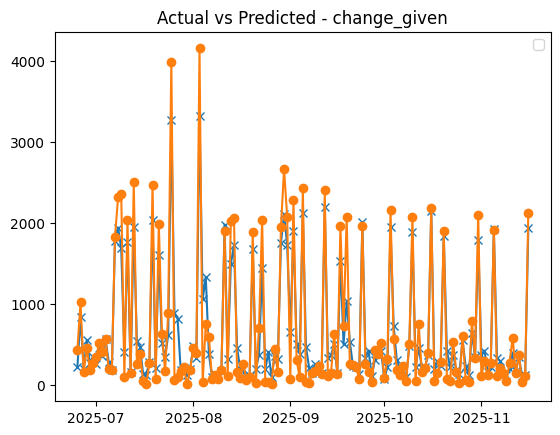

<Figure size 1200x400 with 0 Axes>

RMSE: 274.1054723422222
MAE : 183.65587075279498
R2  : 0.9013


In [17]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Predict on test set
pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)


plt.tight_layout()
plt.title('Actual vs Predicted - change_given')
plt.legend()
plt.plot(y_test.index, pred, label='predicted', marker='x')
plt.plot(y_test.index, y_test, label='actual', marker='o')
plt.figure(figsize=(12,4))# Plot actual vs predicted for visual checkprint("R2 :", r2)

plt.show()
print("RMSE:", rmse)
print("MAE :", mae)

print(f"R2  : {r2:.4f}")

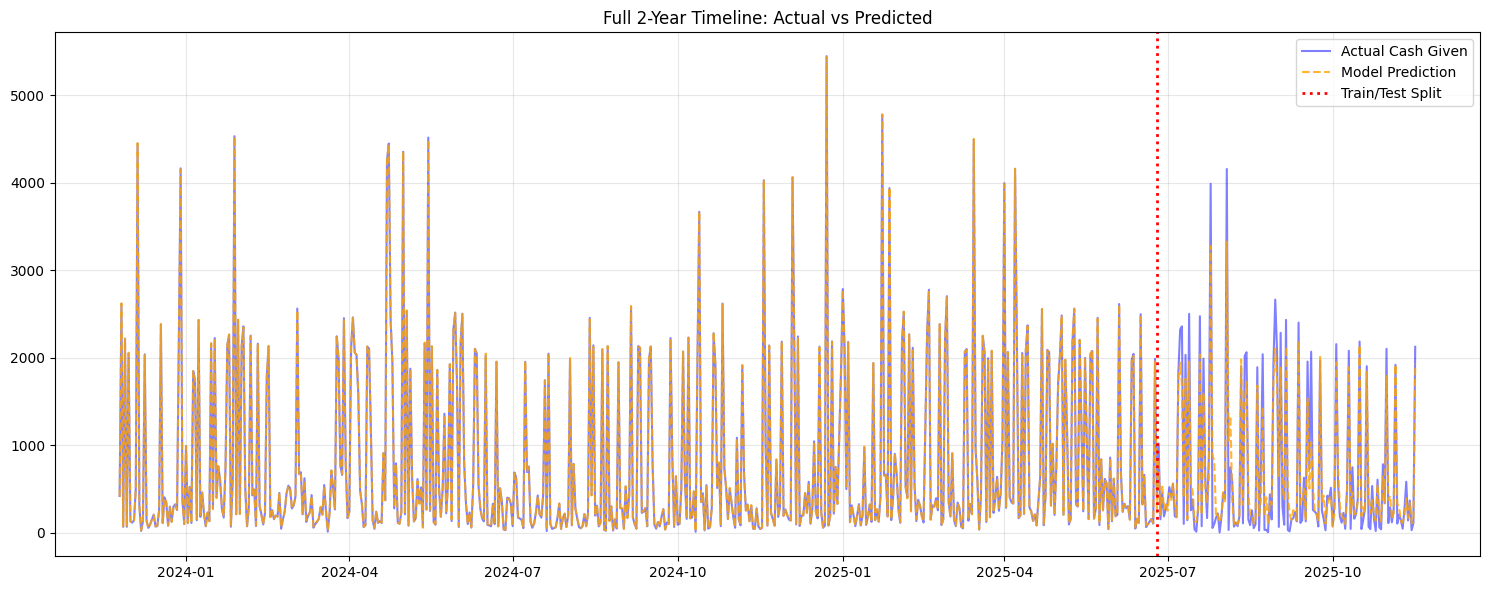

In [18]:
import matplotlib.pyplot as plt

# 1. Predict on the ENTIRE dataset (Train + Test)
# We use the full X matrix you created earlier
X_all = df_model.select_dtypes(include=[np.number]).drop(columns=['change_given'], errors='ignore')
y_all = df_model['change_given']

# Get predictions for everything
all_predictions = model.predict(X_all)

# 2. Plot the Full 2 Years
plt.figure(figsize=(15, 6))

# Plot Actual Data (Blue)
plt.plot(y_all.index, y_all, label='Actual Cash Given', color='blue', alpha=0.5)

# Plot Model Predictions (Orange)
plt.plot(y_all.index, all_predictions, label='Model Prediction', color='orange', alpha=0.8, linestyle='--')

# Add a vertical line showing where Training ended and Test began
test_start_date = y_test.index[0]
plt.axvline(x=test_start_date, color='red', linestyle=':', linewidth=2, label='Train/Test Split')

plt.title('Full 2-Year Timeline: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
import joblib
# 'model' is the variable name of your XGBRegressor
joblib.dump(model, 'model_daily_amount.pkl')

['model_daily_amount.pkl']